# Classical ML for Image Classification

## section 0 : Importing the feature extracted raw data 

In [1]:
import pandas as pd

df = pd.read_csv("data\leaf_features.xlsx")

In [2]:
df.head()

,class,image_name,brightness,texture_0,texture_1,texture_2,texture_3,texture_4,texture_5,texture_6,...,hist_54,hist_55,hist_56,hist_57,hist_58,hist_59,hist_60,hist_61,hist_62,hist_63
0,BACT,BACT_0,105.681213,0.000213,179.414974,0.961457,2327.073882,0.162140,211.321734,9128.880553,...,0.002378,0.002118,0.001198,0.001111,0.000486,0.000278,0.000069,0.000017,0.000000,0.0
1,BACT,BACT_1,121.675126,0.000291,248.781522,0.852087,841.118487,0.123878,243.199118,3115.692426,...,0.000260,0.000208,0.000295,0.000313,0.000226,0.000035,0.000052,0.000069,0.000035,0.0
2,BACT,BACT_10,121.750298,0.000424,599.545049,0.892747,2795.011877,0.130888,243.401063,10580.502458,...,0.008003,0.006944,0.006858,0.007014,0.007865,0.007292,0.005226,0.001128,0.000035,0.0
3,BACT,BACT_11,118.741499,0.000262,250.616348,0.954806,2772.998259,0.160693,237.585471,10841.376687,...,0.003212,0.002795,0.001458,0.001233,0.000382,0.000000,0.000000,0.000000,0.000000,0.0
4,BACT,BACT_12,109.830653,0.000250,219.855194,0.958645,2659.035096,0.149557,219.799164,10416.285189,...,0.000451,0.000122,0.000017,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.0


In [3]:
df.columns

Index(['class', 'image_name', 'brightness', 'texture_0', 'texture_1',
       'texture_2', 'texture_3', 'texture_4', 'texture_5', 'texture_6',
       'texture_7', 'texture_8', 'texture_9', 'texture_10', 'texture_11',
       'texture_12', 'hist_0', 'hist_1', 'hist_2', 'hist_3', 'hist_4',
       'hist_5', 'hist_6', 'hist_7', 'hist_8', 'hist_9', 'hist_10', 'hist_11',
       'hist_12', 'hist_13', 'hist_14', 'hist_15', 'hist_16', 'hist_17',
       'hist_18', 'hist_19', 'hist_20', 'hist_21', 'hist_22', 'hist_23',
       'hist_24', 'hist_25', 'hist_26', 'hist_27', 'hist_28', 'hist_29',
       'hist_30', 'hist_31', 'hist_32', 'hist_33', 'hist_34', 'hist_35',
       'hist_36', 'hist_37', 'hist_38', 'hist_39', 'hist_40', 'hist_41',
       'hist_42', 'hist_43', 'hist_44', 'hist_45', 'hist_46', 'hist_47',
       'hist_48', 'hist_49', 'hist_50', 'hist_51', 'hist_52', 'hist_53',
       'hist_54', 'hist_55', 'hist_56', 'hist_57', 'hist_58', 'hist_59',
       'hist_60', 'hist_61', 'hist_62', 'hist_63']

## Feature Scaling / Normalization
        ----- To ensure that models are not biased by features with large scales:

In [4]:
from sklearn.preprocessing import StandardScaler

# Drop target columns and scale only features
X = df.drop(["class", "image_name"], axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc,
)
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import warnings

warnings.filterwarnings("ignore")



# LOAD AND PREPARE DATA
# ------------------------


In [ ]:
df = pd.read_csv("data\leaf_features.xlsx")  # 🔁 Replace with your actual path

X = df.drop(columns=["class", "image_name"])
y = df["class"]

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### Split the data into 80% train and 20% test splits:

In [15]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Define Models and hyperparameter space for Grid-Search CV 
    


# MODEL CONFIGURATIONS


In [ ]:
models = {
    "SVC": (
        SVC(probability=True),
        {
            "C": [0.00015, 0.00125, 0.1, 1, 5, 10],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "decision_function_shape": ["ovo", "ovr"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(),
        {
            "n_estimators": [2, 5, 10, 20, 50, 100, 200],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [2, 3, 4, 5, 7, 10, None],
        },
    ),
    "DecisionTree": (
        DecisionTreeClassifier(),
        {
            "max_depth": [1, 2, 3, 4, 5, 8, 10, None],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_leaf_nodes": [1, 2, 3, 5, 8, 10],
        },
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
        {
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "learning_rate": [0.00125, 0.00257, 0.014, 0.1],
        },
    ),
}



# Mlflow Experimentation /

🔍 Training SVC...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


2025/07/23 00:20:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/23 00:20:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ SVC complete. Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
🔍 Training RandomForest...
Fitting 5 folds for each of 147 candidates, totalling 735 fits


2025/07/23 00:21:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/23 00:21:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ RandomForest complete. Best Params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 20}
🔍 Training DecisionTree...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


2025/07/23 00:21:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/23 00:21:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ DecisionTree complete. Best Params: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10}
🔍 Training XGBoost...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


2025/07/23 00:22:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/23 00:22:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ XGBoost complete. Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


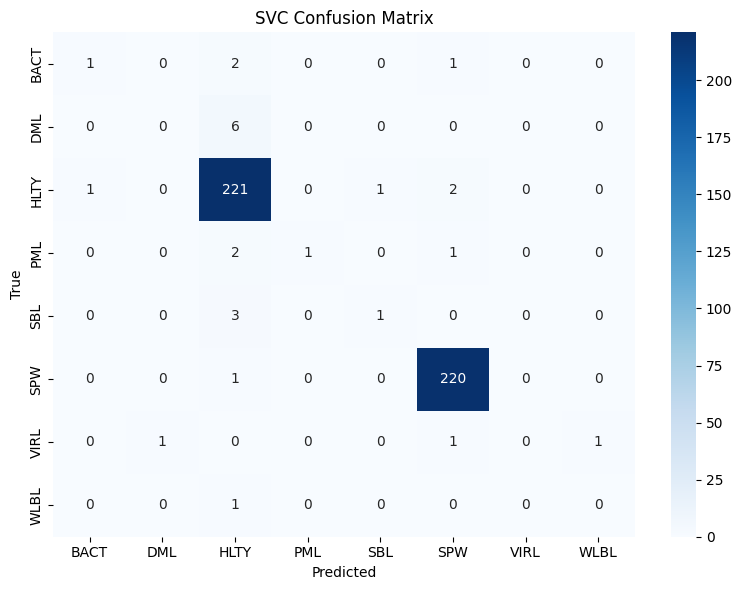

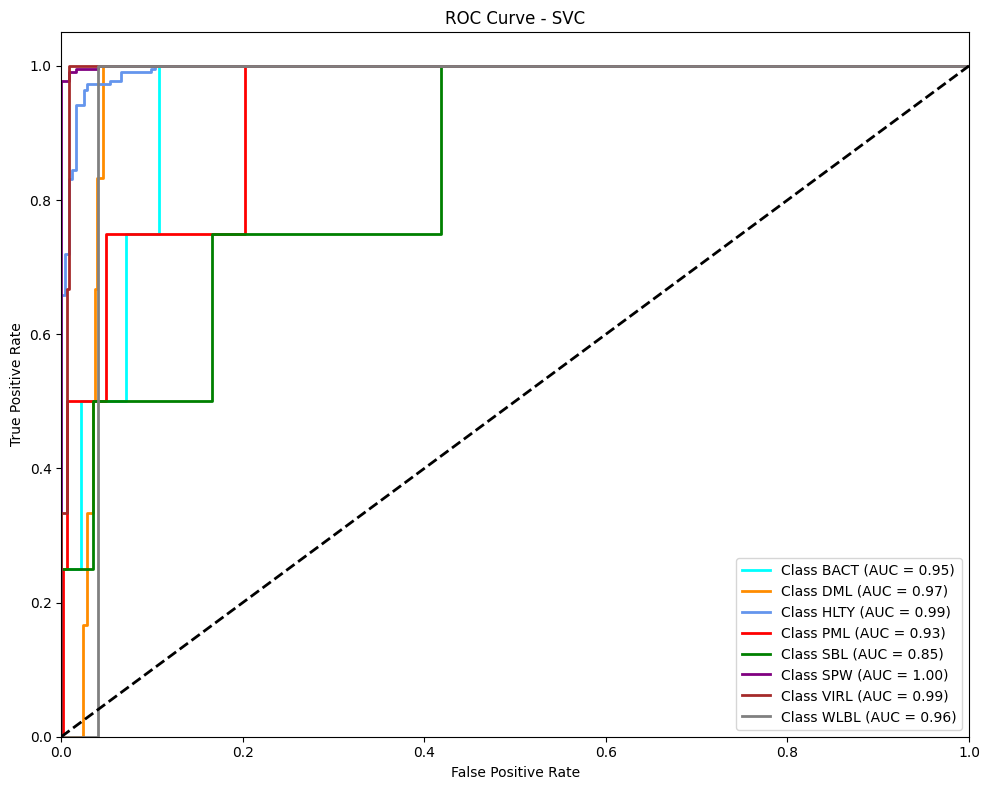

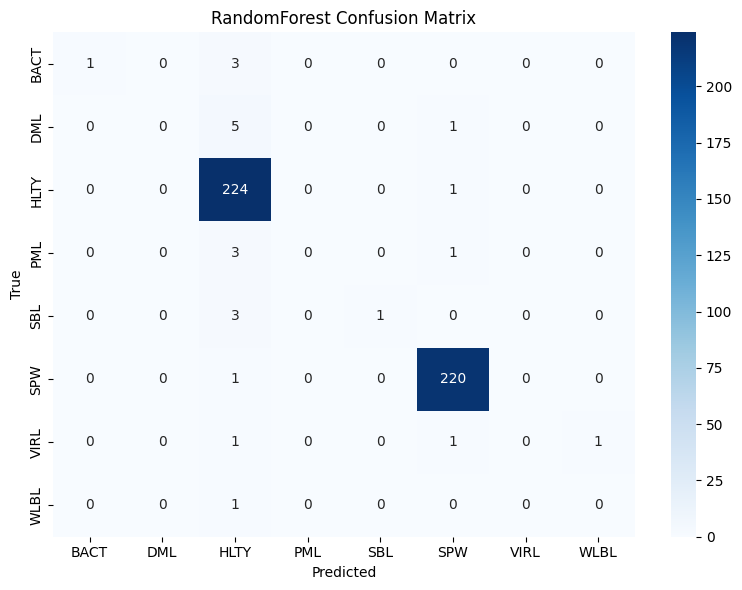

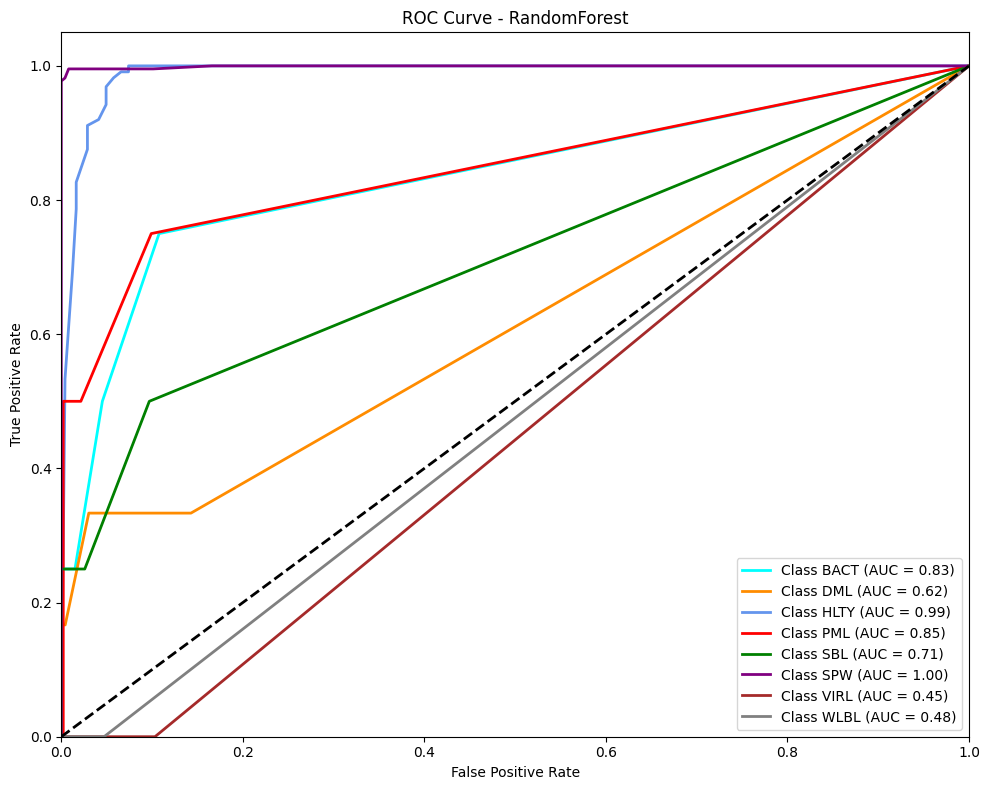

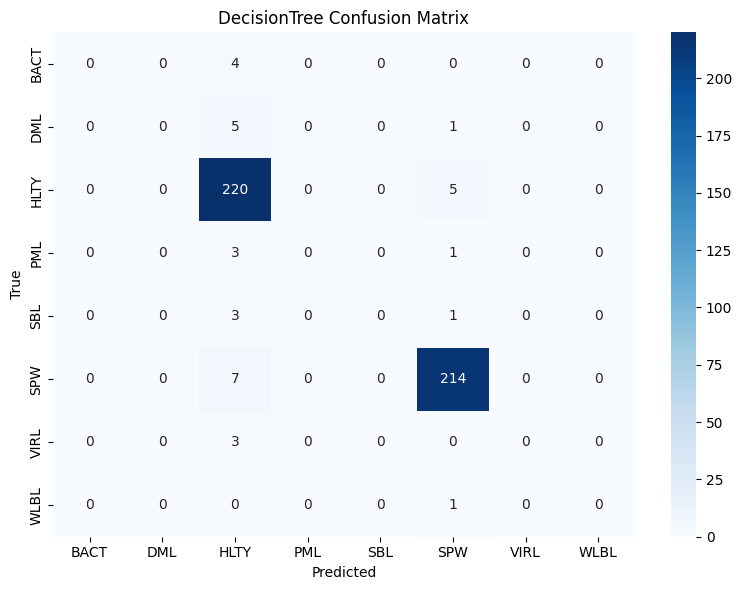

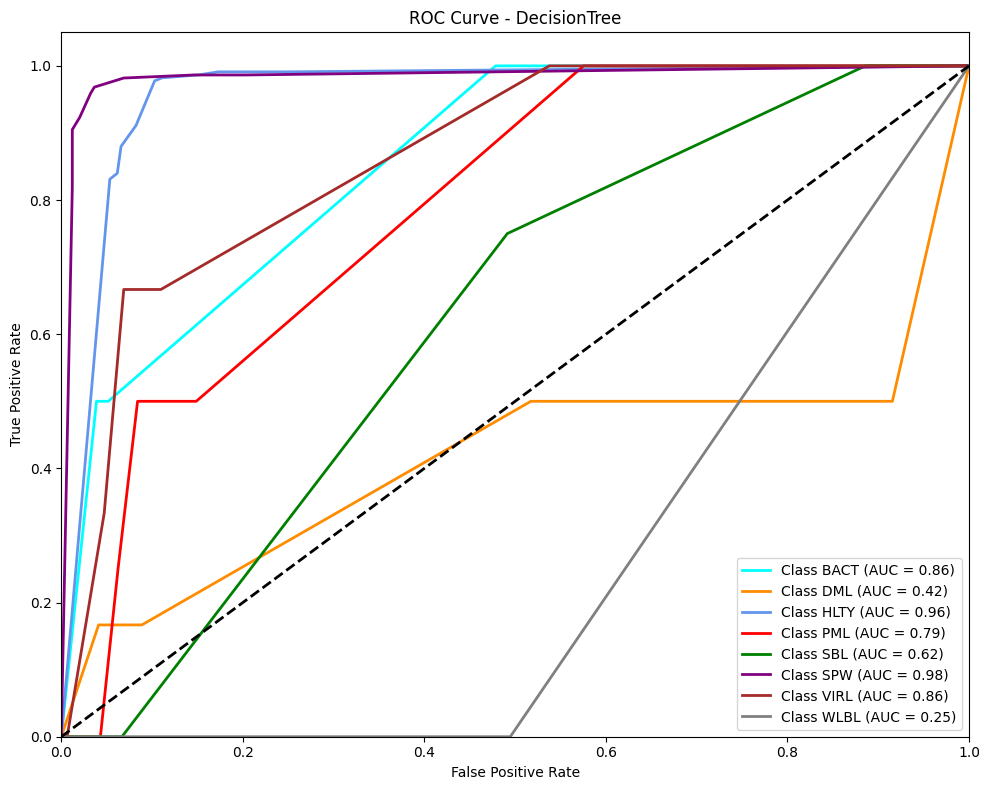

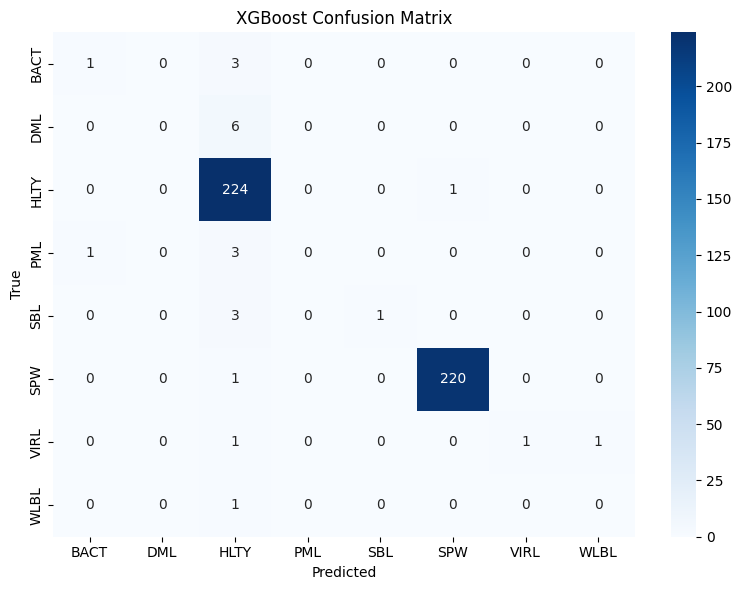

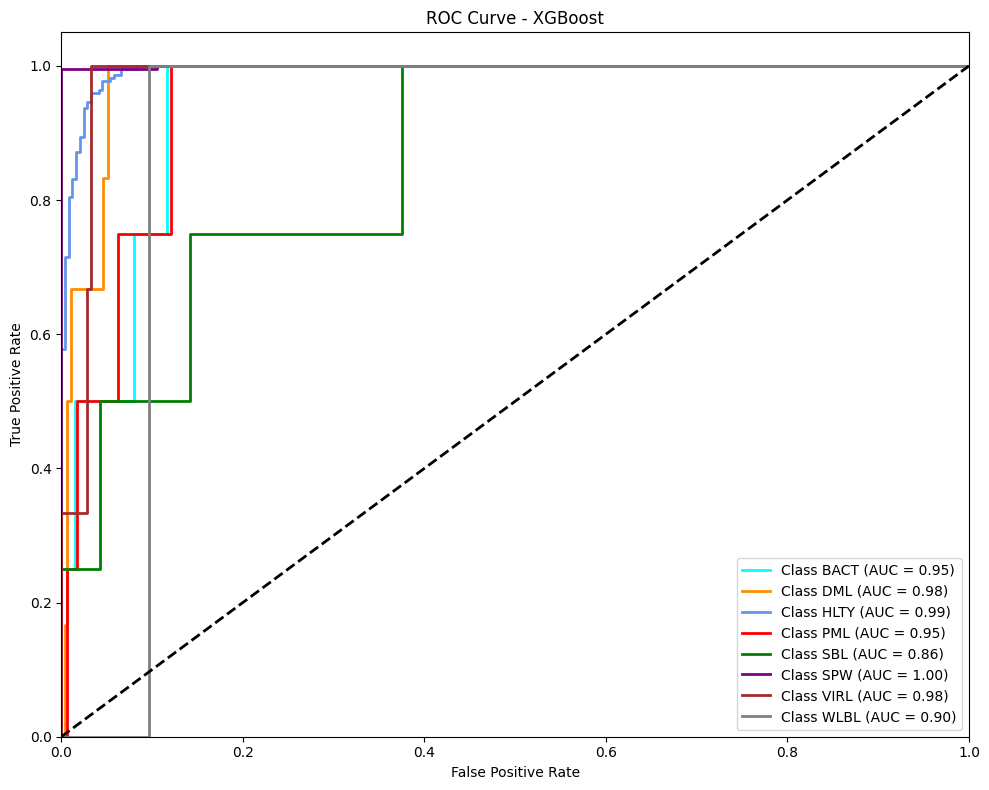

In [ ]:
mlflow.set_experiment("Leaf_Classification_MultiClass- Classical ML Techniques")

for model_name, (model, param_grid) in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"🔍 Training {model_name}...")

        grid = GridSearchCV(
            model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
        )
        grid.fit(X_train_scaled, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_val_scaled)
        y_proba = best_model.predict_proba(X_val_scaled)

        # ------------------------
        # METRICS
        # ------------------------
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average="weighted")
        rec = recall_score(y_val, y_pred, average="weighted")
        f1 = f1_score(y_val, y_pred, average="weighted")

        # One-hot encode y for ROC-AUC
        classes = np.unique(y_encoded)
        y_bin = label_binarize(y_val, classes=classes)
        auc_score = roc_auc_score(y_bin, y_proba, average="weighted", multi_class="ovr")

        mlflow.log_params(grid.best_params_)
        mlflow.log_metrics(
            {
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1_score": f1,
                "roc_auc": auc_score,
            }
        )

        # ------------------------
        # CONFUSION MATRIX
        # ------------------------
        cm = confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
        )
        plt.title(f"{model_name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        cm_path = f"{model_name}_confusion_matrix.png"
        plt.savefig(cm_path)
        mlflow.log_artifact(cm_path)

        # ------------------------
        # MULTI-CLASS ROC CURVE
        # ------------------------
        fpr, tpr, roc_auc = {}, {}, {}
        n_classes = len(classes)
        plt.figure(figsize=(10, 8))
        colors = cycle(
            [
                "aqua",
                "darkorange",
                "cornflowerblue",
                "red",
                "green",
                "purple",
                "brown",
                "gray",
            ]
        )

        for i, color in zip(range(n_classes), colors):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=2,
                label=f"Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:0.2f})",
            )

        plt.plot([0, 1], [0, 1], "k--", lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        roc_path = f"{model_name}_roc_curve.png"
        plt.savefig(roc_path)
        mlflow.log_artifact(roc_path)

        # ------------------------
        # LOG MODEL
        # ------------------------
        mlflow.sklearn.log_model(best_model, model_name + "_model")

        print(f"✅ {model_name} complete. Best Params: {grid.best_params_}")